# The cost function is NOT independent of number of trials

You might think that different  numbers of trials just affect variability in the cost function, not the mean value.  **This is wrong.**

Take a well-trained network and a random seed equal to the one used to measure cost at, say 10000 trials.  The cost function includes a squared error term for how close to the target the mean hits are. At few trials, the typical distance to the target will be greater than for many trials. So, as number of trials grows, cost falls, even under these conditions.  



<img src="costs_vs_ntrials.png">



In [2]:
# === general startup

include("startup.jl")
include("commonSetup.jl")


     finished loading system modules in startup.jl ---
     finished loading user modules in startup.jl ---

--- finished loading startup.jl ---



1×2 Array{Float64,2}:
 1.0  1.2

In [4]:
# === read in an example farm

u = readdir("../../MiniC32/")
i=1; G = load("../../MiniC32/$(u[i])")

extra_pars = G["extra_pars"]
extra_pars[:plot_conditions] = true
extra_pars[:pro_better_than_anti] = true

mypars[:rule_and_delay_periods] = [1.0 1.2]


┌ Warning: type oldbool not present in workspace; reconstructing
└ @ JLD /Users/carlos/.julia/packages/JLD/jeGJb/src/jld_types.jl:697


1×2 Array{Float64,2}:
 1.0  1.2

In [17]:
# === now run the farm nruns times at each of different # of trials, OR load from pre-run

generate_costs = false

if generate_costs
    ns = [25,50,100,200,400,800]   # of trials
    nruns=10   # of runs at eah # of trials
    costs = zeros(length(ns), nruns)  # record of costs

    for nsi=1:length(ns)
        for r=1:nruns
           ntrials = ns[nsi]; extra_pars[:nPro] = ntrials; extra_pars[:nAnti] = ntrials; extra_pars[:seedrand] = NaN; costs[nsi,r] = JJ(extra_pars[:nPro], extra_pars[:nAnti]; verbose=false, asDict=true, make_dict(args, G["pars3"], merge(mypars, extra_pars))...)["cost"]
           println("Did ns=$(ns[nsi]) run $r/$nruns.")
        end
    end

    @save "costs_vs_ntrials.jld" ns nruns costs
else
    @load "costs_vs_ntrials.jld"
end

3-element Array{Symbol,1}:
 :costs
 :nruns
 :ns   

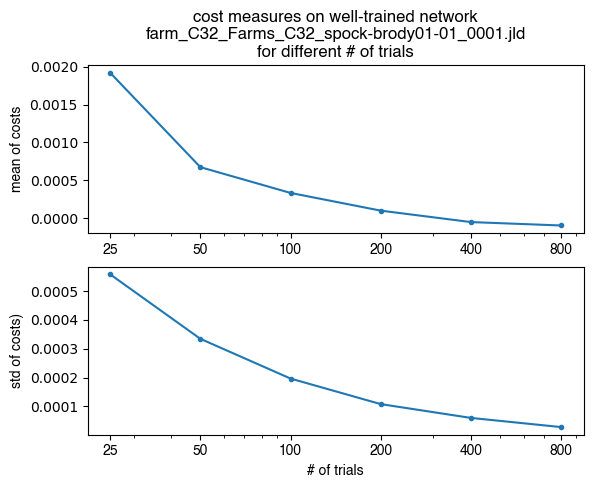

In [28]:
# === generate the plot
PyPlot.rc("font", serif="Helvetica Neue")

figure();
subplot(2,1,1)
semilogx(ns, mean(costs, dims=2), ".-"); ylabel("mean of costs", fontname="Helvetica")
title("cost measures on well-trained network\n$(u[1])\nfor different # of trials",
    fontname="Helvetica")
gca().set_xticks(ns)
gca().set_xticklabels(map(x->string(x), ns), fontname="Helvetica")

subplot(2,1,2)
semilogx(ns, std(costs, dims=2), ".-"); ylabel("std of costs)", fontname="Helvetica")
xlabel("# of trials", fontname="Helvetica")
gca().set_xticks(ns)
gca().set_xticklabels(map(x->string(x), ns), fontname="Helvetica");

savefig("costs_vs_ntrials.png")


